# British Airways Reviews
## Group number 9
### <span style="color:blue">מגישים: טל אגאי , גילי צור ואיתיאל נחשוני
</span>

<div>
<img src="https://raw.githubusercontent.com/giliandtal/project/main/תמונה מטוס.jpg?raw=true" width="100%"/>
</div>

## <b id="section_2">  </b> <b style='color:#F05454'>Relevant libraries </b> <b></b> 
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from IPython.display import display, HTML

## <b id="section_2">  </b> <b style='color:#F05454'>Data Information </b> <b></b> 

<div style="direction: rtl; text-align: right;">  
הקובץ עוסק בדירוג של נוסעים בחברת התעופה BRITISH AIRWAYS 
<br>   
הקטגוריות לפיהן דירגו הנוסעים הן: נוחות המושב, מזון ומשקאות,בידור,וויפי ואינטרנט,צוות דיילי אוויר, צוות דיילי קרקע, מחיר מול תמורה ודירוג כולל.
<br>     
המידע נלקח מאתר KUGGLE:
<br>
https://www.kaggle.com/datasets/chaudharyanshul/airline-reviews
<br>
המידע בKUGGLE נלקח מAirline quality:
<br>
https://www.airlinequality.com/airline-reviews/british-airways
</div>
 


In [2]:
url='https://raw.githubusercontent.com/giliandtal/project/main/BA_AirlineReviews.csv'
BA_DF=pd.read_csv(url)
BA_DF.head()

,Unnamed: 0,OverallRating,ReviewHeader,Name,Datetime,VerifiedReview,ReviewBody,TypeOfTraveller,SeatType,Route,DateFlown,SeatComfort,CabinStaffService,GroundService,ValueForMoney,Recommended,Aircraft,Food&Beverages,InflightEntertainment,Wifi&Connectivity
0,0,1.0,"""Service level far worse then Ryanair""",L Keele,19th November 2023,True,4 Hours before takeoff we received a Mail stat...,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,1.0,1.0,no,NaN,NaN,NaN,NaN
1,1,3.0,"""do not upgrade members based on status""",Austin Jones,19th November 2023,True,I recently had a delay on British Airways from...,Business,Economy Class,Brussels to London,November 2023,2.0,3.0,1.0,2.0,no,A320,1.0,2.0,2.0
2,2,8.0,"""Flight was smooth and quick""",M A Collie,16th November 2023,False,"Boarded on time, but it took ages to get to th...",Couple Leisure,Business Class,London Heathrow to Dublin,November 2023,3.0,3.0,4.0,3.0,yes,A320,4.0,NaN,NaN
3,3,1.0,"""Absolutely hopeless airline""",Nigel Dean,16th November 2023,True,"5 days before the flight, we were advised by B...",Couple Leisure,Economy Class,London to Dublin,December 2022,3.0,3.0,1.0,1.0,no,NaN,NaN,NaN,NaN
4,4,1.0,"""Customer Service is non existent""",Gaylynne Simpson,14th November 2023,False,"We traveled to Lisbon for our dream vacation, ...",Couple Leisure,Economy Class,London to Lisbon,November 2023,1.0,1.0,1.0,1.0,no,NaN,1.0,1.0,1.0


In [3]:
BA_DF.shape

(3701, 20)

In [4]:
BA_DF.columns

Index(['Unnamed: 0', 'OverallRating', 'ReviewHeader', 'Name', 'Datetime',
       'VerifiedReview', 'ReviewBody', 'TypeOfTraveller', 'SeatType', 'Route',
       'DateFlown', 'SeatComfort', 'CabinStaffService', 'GroundService',
       'ValueForMoney', 'Recommended', 'Aircraft', 'Food&Beverages',
       'InflightEntertainment', 'Wifi&Connectivity'],
      dtype='object')

In [5]:
BA_DF.isnull().sum()

Unnamed: 0                  0
OverallRating               5
ReviewHeader                0
Name                        0
Datetime                    0
VerifiedReview              0
ReviewBody                  0
TypeOfTraveller           771
SeatType                    2
Route                     775
DateFlown                 778
SeatComfort               116
CabinStaffService         127
GroundService             846
ValueForMoney               1
Recommended                 0
Aircraft                 1779
Food&Beverages            386
InflightEntertainment    1150
Wifi&Connectivity        3092
dtype: int64

## <b id="section_2">  </b> <b style='color:#F05454'>Introduction </b> <b></b>
---

<Axes: xlabel='ValueForMoney', ylabel='count'>

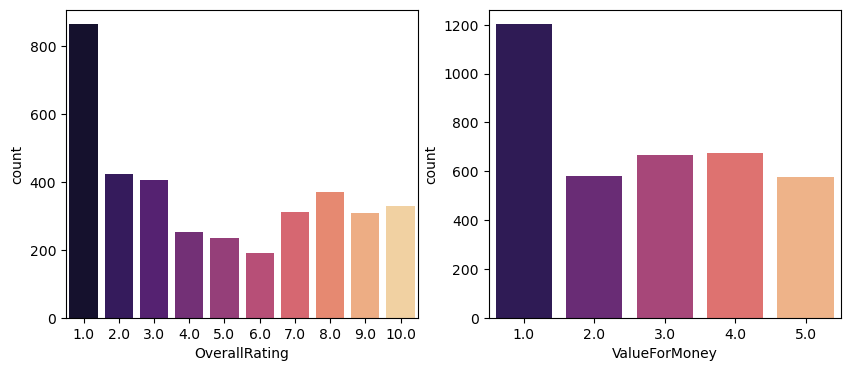

In [6]:
fig, axes = plt.subplots(figsize=(10,4), ncols=2)
sns.countplot(data=BA_DF, x="OverallRating",ax=axes[0],palette='magma')
sns.countplot(data=BA_DF, x="ValueForMoney",ax=axes[1],palette='magma')

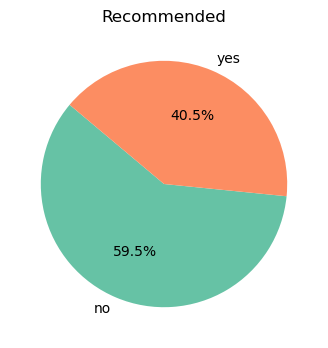

In [7]:
value_counts = BA_DF['Recommended'].value_counts()
colors = sns.color_palette('Set2', len(value_counts))
plt.figure(figsize=(4, 4))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140,colors=colors)
plt.title('Recommended')
plt.show()

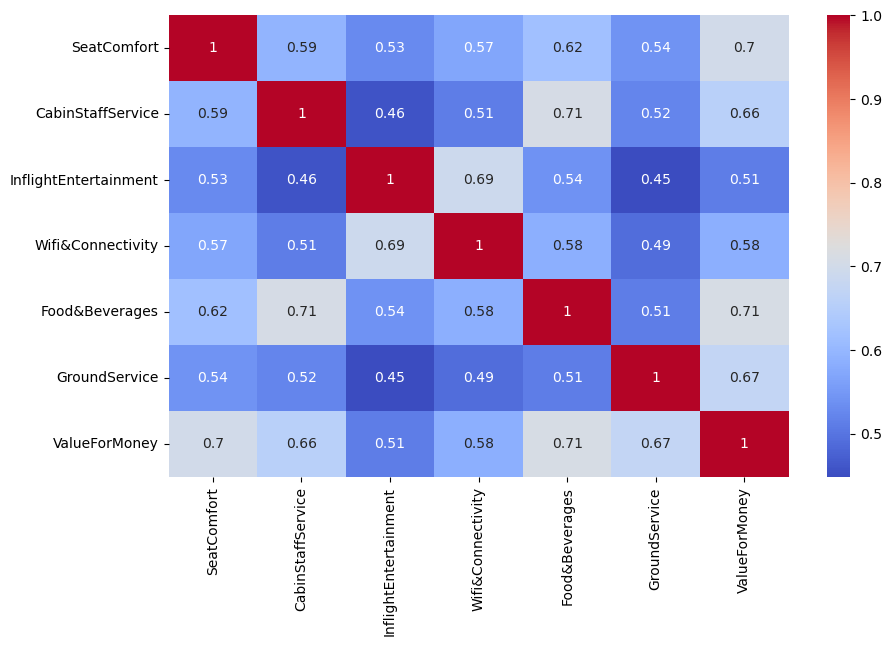

In [8]:
columns_of_interest = ['SeatComfort','CabinStaffService','InflightEntertainment','Wifi&Connectivity','Food&Beverages', 'GroundService', 'ValueForMoney']
df_selected = BA_DF[columns_of_interest]
correlation_matrix = df_selected.corr()

plt.figure(figsize=(10,6))
sns.heatmap(data=correlation_matrix,cmap='coolwarm', annot=True, xticklabels=columns_of_interest, yticklabels=columns_of_interest)
plt.show()

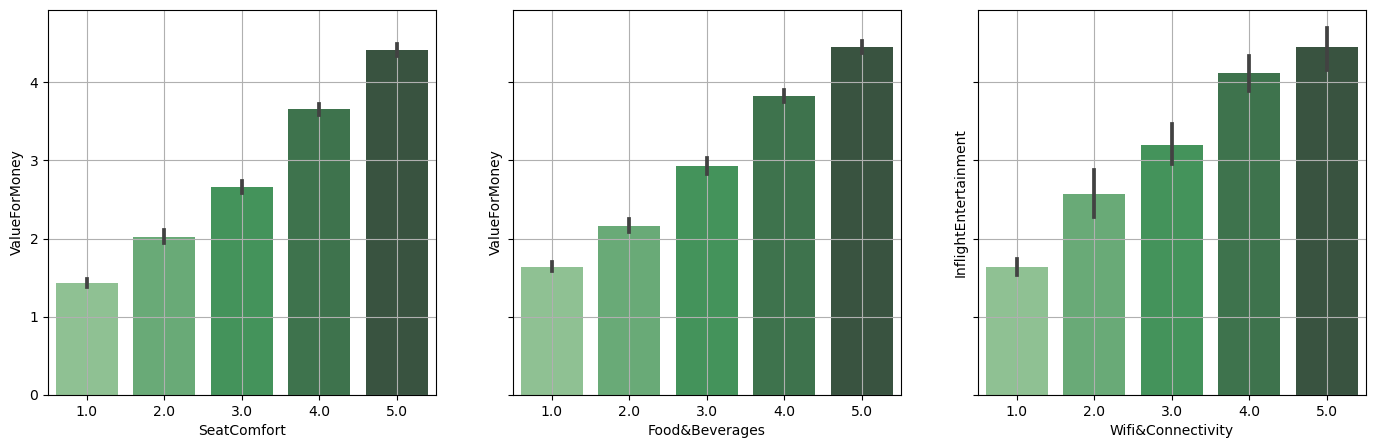

In [9]:
fig, axes = plt.subplots(1,3 , figsize=(17, 5), sharey=True)

sns.barplot(x="SeatComfort", y="ValueForMoney", data=BA_DF,ax=axes[0],palette="Greens_d")
sns.barplot(x="Food&Beverages", y="ValueForMoney", data=BA_DF, ax=axes[1],palette="Greens_d")
sns.barplot(x="Wifi&Connectivity", y="InflightEntertainment", data=BA_DF, ax=axes[2],palette="Greens_d")


axes[0].grid(True)
axes[1].grid(True)
axes[2].grid(True)


נראה כי הקשרים החזקים ביותר הן בין הבידור לוויפי, בין נוחות מושב לתמורה ביחס לכסף, בין מזון ומשקאות לתמורה ביחס לכסף ובין יחס צוות המטוס למזון ומשקאות..
 רואים כי אנשים שמרוצים מהמזון והמשקאות או מנוחות המושב- מרגישים שיש תמורה לכסף ששילמו  


## <b id="section_2">  </b> <b style='color:#F05454'>First Conclusion </b> <b></b> 
---

:בדיקת הדירוג הכולל של כל מחלקה לפי סוג הנוסע

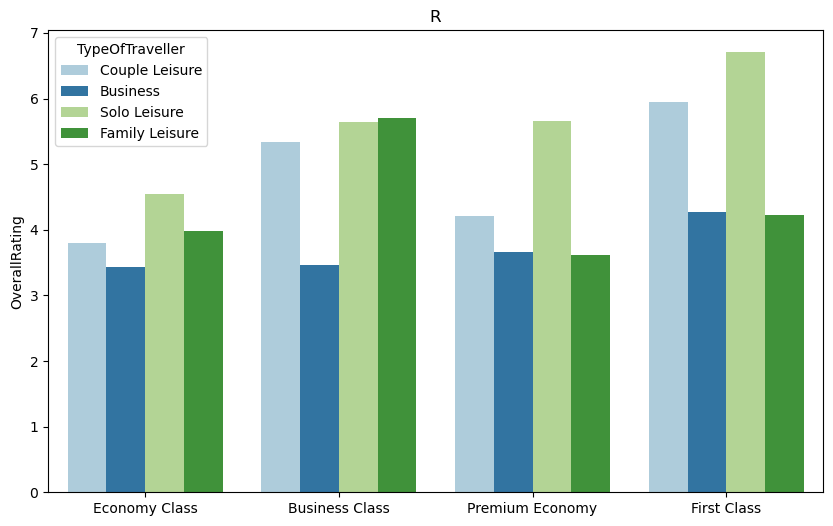

In [10]:
plt.figure(figsize=(10,6))
sns.barplot(x="SeatType", y="OverallRating", hue="TypeOfTraveller",  errorbar=None, data=BA_DF,palette="Paired")
plt.xlabel("")
plt.ylabel("OverallRating")
plt.title("R")
plt.show()

:בדיקת ממוצע הדירוג של המשפחות בכל קטגוריה לפי סוג המחלקה

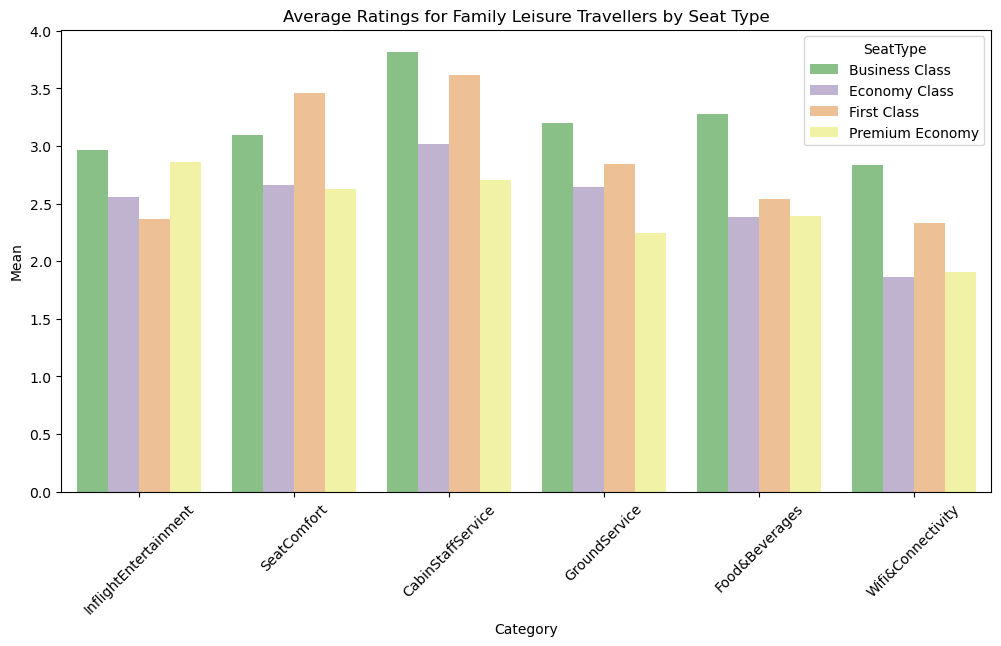

In [11]:
solo_df = BA_DF[BA_DF['TypeOfTraveller'] == "Family Leisure"]  
solo_means = solo_df.groupby('SeatType')[['InflightEntertainment', 'SeatComfort', 'CabinStaffService', 'GroundService', 'Food&Beverages', 'Wifi&Connectivity']].mean().reset_index() 
solo_means_long = solo_means.melt(id_vars='SeatType', var_name='Category', value_name='Mean') 

plt.figure(figsize=(12, 6)) 
sns.barplot(x='Category', y='Mean', hue='SeatType', data=solo_means_long, palette="Accent") 
plt.title('Average Ratings for Family Leisure Travellers by Seat Type') 
plt.xticks(rotation=45) 

plt.show()  


<div style="direction: rtl; text-align: right;">
מסקנה:
<br>    
בדקנו את שביעות רצונם של סוגי הנוסעים(שטסים לבד/משפחות/בזוגות/אנשי עסקים) מול המחלקה בה הם טסים(Economy Class/Premium Economy/Business Class/First Class).
<br>   
מצאנו כי אנשים שטסים לבד, בדירוג כולל נתנו ציון גבוה בפער משאר סוגי הנוסעים כמעט בכל המחלקות.
<br>    
נוסף על כך, מהגרף הראשון אנו רואים כי הדירוג הכולל של משפחות במחלקת עסקים היה גבוה בפער מהדירוג שלהן בשאר המחלקות ואף גבוה מהדירוגים של הסוגים האחרים של הנוסעים.
<br>    
 בעקבות כך נכנסו לעובי הקורה על מנת לנסות ולראות מדוע הדירוג של המשפחות במחלקת עסקים הוא הגבוה ביותר וגילינו כי בכל התחומים מלבד ב"seat comfort"הדירוגים של המשפחות היו הגבוהים ביותר במחלקה זו, ואפילו יותר גבוהים מהדירוגים של מחלקת Firstclass.
<br> 
משפחות במחלקת Business יותר מרוצות כמעט בכל הקטגוריות ממשפחות במחלקות אחרות. 
</div>


## <b id="section_2">  </b> <b style='color:#F05454'>Second Conclusion </b> <b></b> 
---

:בדקנו דירוג כולל לפי סוג מחלקה

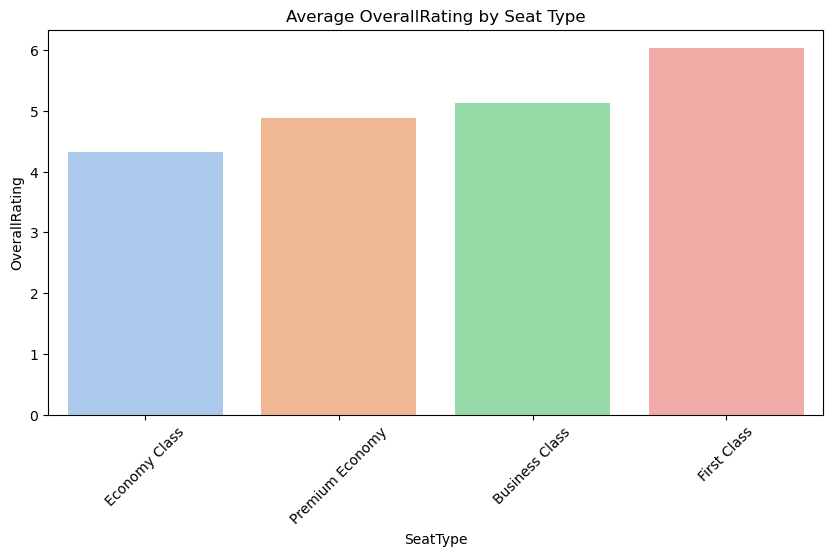

In [12]:
seat_comfort_means = BA_DF.groupby('SeatType')['OverallRating'].mean().reset_index()

seat_comfort_means = seat_comfort_means.sort_values(by='OverallRating')

plt.figure(figsize=(10, 5))
sns.barplot(x='SeatType', y='OverallRating', data=seat_comfort_means, palette='pastel')
plt.title('Average OverallRating by Seat Type')
plt.xticks(rotation=45)
plt.show()

התפלגות הדירוגים בכל קטגוריה ב Economy Class: 

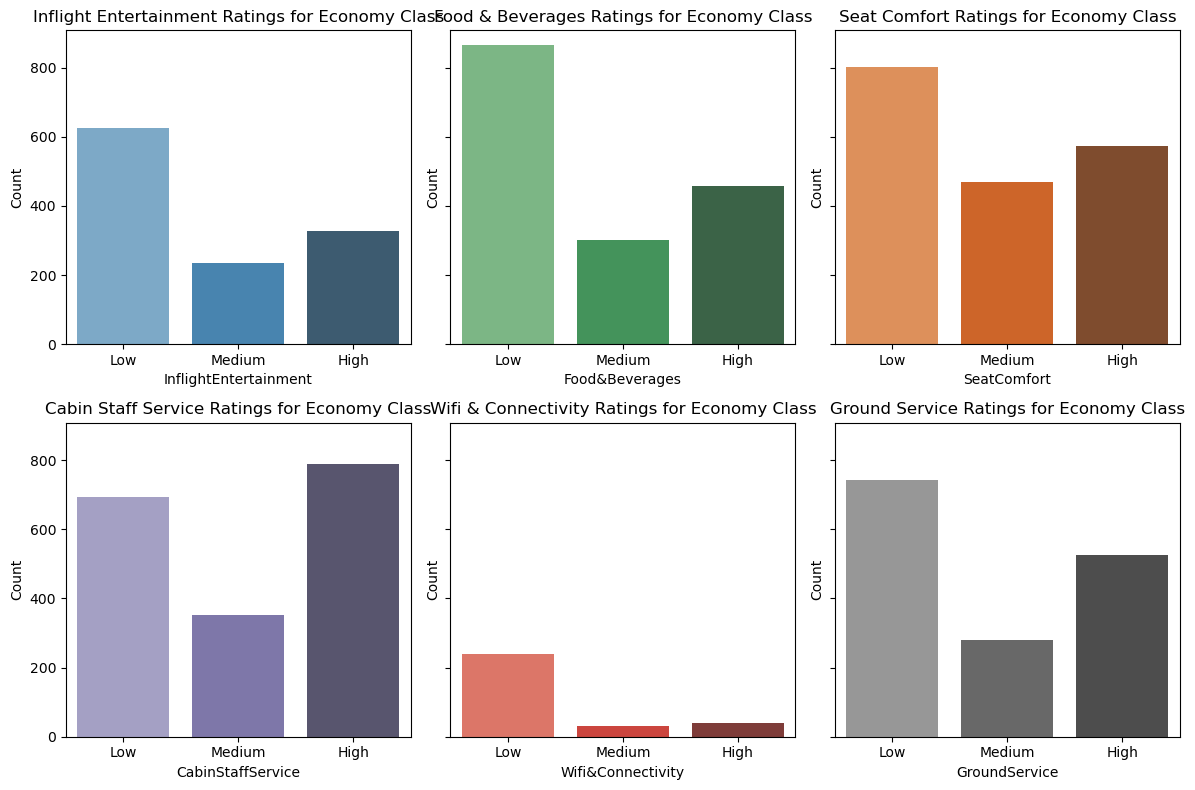

In [13]:
def map_ratings(value):
    if value in [1, 2]:
        return 'Low'
    elif value == 3:
        return 'Medium'
    elif value in [4, 5]:
        return 'High'

ECONOMY_class_df = BA_DF[BA_DF['SeatType'] == 'Economy Class'].copy()

ECONOMY_class_df.loc[:, 'InflightEntertainmentMapped'] = ECONOMY_class_df['InflightEntertainment'].apply(map_ratings)
ECONOMY_class_df.loc[:, 'Food&BeveragesMapped'] = ECONOMY_class_df['Food&Beverages'].apply(map_ratings)
ECONOMY_class_df.loc[:, 'SeatComfortMapped'] = ECONOMY_class_df['SeatComfort'].apply(map_ratings)
ECONOMY_class_df.loc[:, 'CabinStaffServiceMapped'] = ECONOMY_class_df['CabinStaffService'].apply(map_ratings)
ECONOMY_class_df.loc[:, 'Wifi&ConnectivityMapped'] = ECONOMY_class_df['Wifi&Connectivity'].apply(map_ratings)
ECONOMY_class_df.loc[:, 'GroundServiceMapped'] = ECONOMY_class_df['GroundService'].apply(map_ratings)

inflight_counts = ECONOMY_class_df['InflightEntertainmentMapped'].value_counts().sort_index().reset_index()
inflight_counts.columns = ['InflightEntertainment', 'Count']

food_bev_counts = ECONOMY_class_df['Food&BeveragesMapped'].value_counts().sort_index().reset_index()
food_bev_counts.columns = ['Food&Beverages', 'Count']

SeatComfort_counts = ECONOMY_class_df['SeatComfortMapped'].value_counts().sort_index().reset_index()
SeatComfort_counts.columns = ['SeatComfort', 'Count']

CabinStaffService_counts = ECONOMY_class_df['CabinStaffServiceMapped'].value_counts().sort_index().reset_index()
CabinStaffService_counts.columns = ['CabinStaffService', 'Count']

WifiConnectivity_counts = ECONOMY_class_df['Wifi&ConnectivityMapped'].value_counts().sort_index().reset_index()
WifiConnectivity_counts.columns = ['Wifi&Connectivity', 'Count']

GroundService_counts = ECONOMY_class_df['GroundServiceMapped'].value_counts().sort_index().reset_index()
GroundService_counts.columns = ['GroundService', 'Count']

fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharey=True)

sns.barplot(ax=axes[0, 0], x='InflightEntertainment', y='Count', data=inflight_counts, palette='Blues_d',order=["Low", "Medium", "High"])
axes[0, 0].set_title('Inflight Entertainment Ratings for Economy Class')
sns.barplot(ax=axes[0, 1], x='Food&Beverages', y='Count', data=food_bev_counts, palette='Greens_d',order=["Low", "Medium", "High"])
axes[0, 1].set_title('Food & Beverages Ratings for Economy Class')
sns.barplot(ax=axes[0, 2], x='SeatComfort', y='Count', data=SeatComfort_counts, palette='Oranges_d',order=["Low", "Medium", "High"])
axes[0, 2].set_title('Seat Comfort Ratings for Economy Class')
sns.barplot(ax=axes[1, 0], x='CabinStaffService', y='Count', data=CabinStaffService_counts, palette='Purples_d',order=["Low", "Medium", "High"])
axes[1, 0].set_title('Cabin Staff Service Ratings for Economy Class')
sns.barplot(ax=axes[1, 1], x='Wifi&Connectivity', y='Count', data=WifiConnectivity_counts, palette='Reds_d',order=["Low", "Medium", "High"])
axes[1, 1].set_title('Wifi & Connectivity Ratings for Economy Class')
sns.barplot(ax=axes[1, 2], x='GroundService', y='Count', data=GroundService_counts, palette='Greys_d',order=["Low", "Medium", "High"])
axes[1, 2].set_title('Ground Service Ratings for Economy Class')

plt.tight_layout()
plt.show()


:השוואת ממוצע דירוגים בכל קטגוריה בין מחלקת אקונומי למחלקה ראשונה

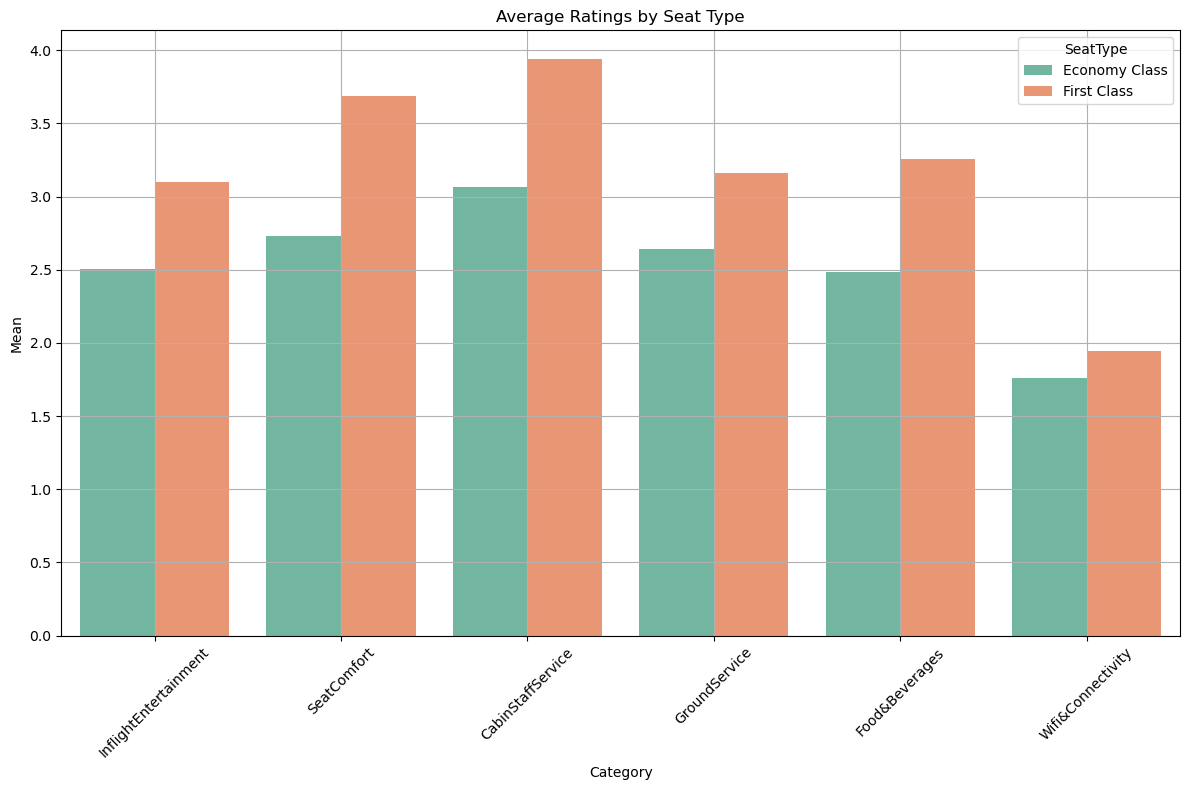

In [14]:
filtered_df = BA_DF[BA_DF['SeatType'].isin(['Economy Class','First Class'])]
columns_of_interest = ['InflightEntertainment', 'SeatComfort', 'CabinStaffService', 'GroundService', 'Food&Beverages', 'Wifi&Connectivity']
means = filtered_df.groupby('SeatType')[columns_of_interest].mean().reset_index()
means_melted = means.melt(id_vars='SeatType', var_name='Category', value_name='Mean')

plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Mean', hue='SeatType', data=means_melted, palette="Set2")
plt.title('Average Ratings by Seat Type')
plt.xticks(rotation=45)  
plt.grid(True)
plt.tight_layout()
plt.show()

גרף ראשון של ממליצים מול לא ממליצים בכל מחלקה וגרף שני מספר מדרגים בכל מחלקה. 

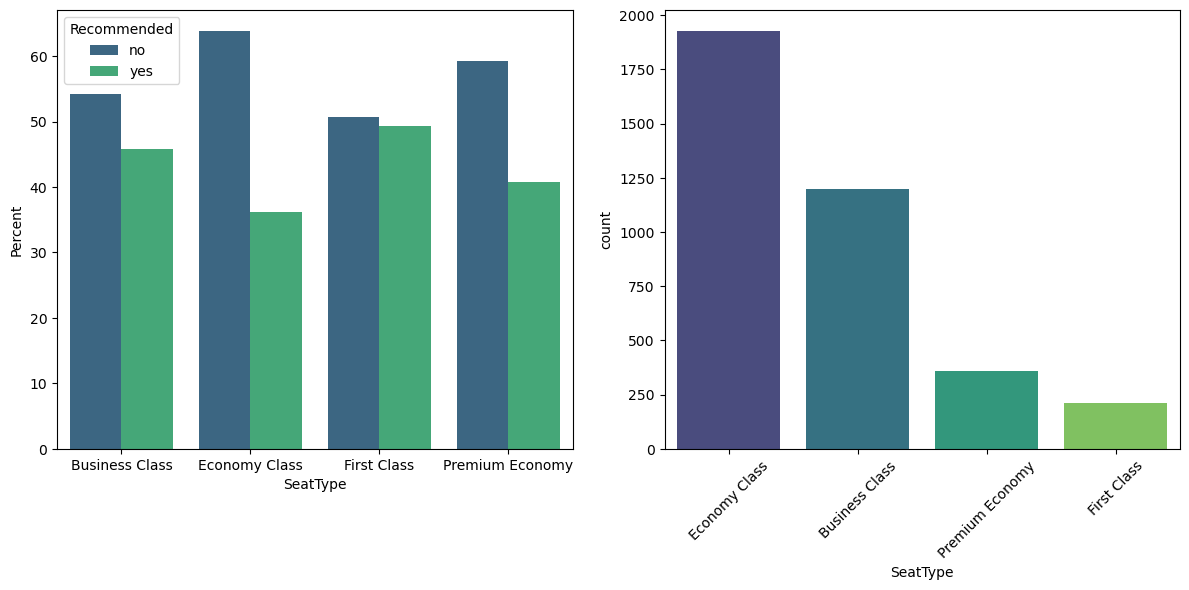

In [15]:
fig, axes = plt.subplots(nrows=1 ,ncols=2, figsize=(12, 6))
percentages = BA_DF.groupby('SeatType')['Recommended'].value_counts(normalize=True).mul(100).rename('Percent').reset_index()

sns.barplot(x='SeatType', y='Percent', hue='Recommended', data=percentages,palette='viridis',ax=axes[0])
sns.countplot(x='SeatType', data=BA_DF, palette='viridis',ax=axes[1])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<div style="direction: rtl; text-align: right;">
כאשר מסתכלים על ציון הדירוג הכללי, רואים שהציון שניתן ע"י Economy Class הוא הנמוך ביותר.
<br>
בדקנו את התפלגות הדירוגים בכל קטגוריה וגילינו כי ברוב הקטגוריות הציונים הנמוכים הם המובילים.
<br>
נוסף על כך השווינו את הדירוגים במחלקת Economy לדירוגים במחלקת First class על מנת לבדוק האם יש קטגוריות מסויימות בהן הדירוגים של Economy גבוהים יותר. וגילינו שבכל הקטגוריות הדירוגים של מחלקת Economy נמוכים יותר.
<br>
ניתן לראות כי מספר הדירוגים במחלקת Economy הוא הגדול ביותר- כלומר ממחלקה זו יש הכי הרבה דירוגים, אך זו גם המחלקה שאחוז הלא-ממליצים בה הוא הגדול ביותר .
</div>


## <b id="section_2">  </b> <b style='color:#F05454'>Third Conclusion </b> <b></b> 
---

:גרף של ממליצים-לא ממליצים במחלקה ראשונה

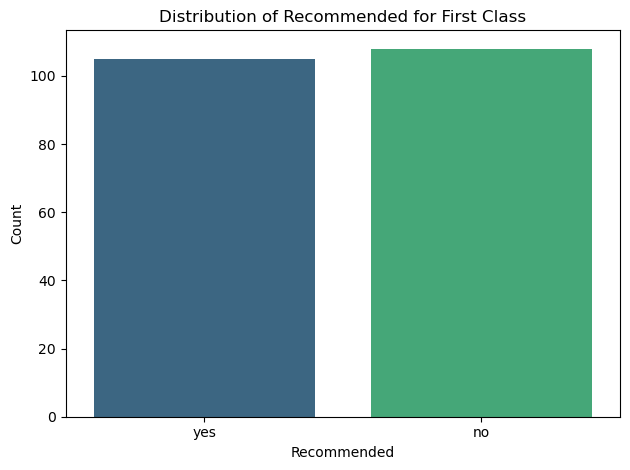

In [16]:
first_class_df = BA_DF[BA_DF['SeatType'] == 'First Class']

sns.countplot(x='Recommended', data=first_class_df, palette='viridis')

plt.title('Distribution of Recommended for First Class')
plt.xlabel('Recommended')
plt.ylabel('Count')

plt.tight_layout()

plt.show()

ניתן לראות שמבין הדירוגים של המחלקה הראשונה מעל 50% מהמדרגים אמרו כי אינם ממליצים לטוס עם חברת התעופה. עלתה השאלה מדוע הם לא מרוצים? הרי זו המחלקה שכרטיס בה הוא היקר ביותר ומצופה שיקבלו את השירות הטוב ביותר ויהיו מרוצים.
:נבדוק את הדירוגים בכל תחום 

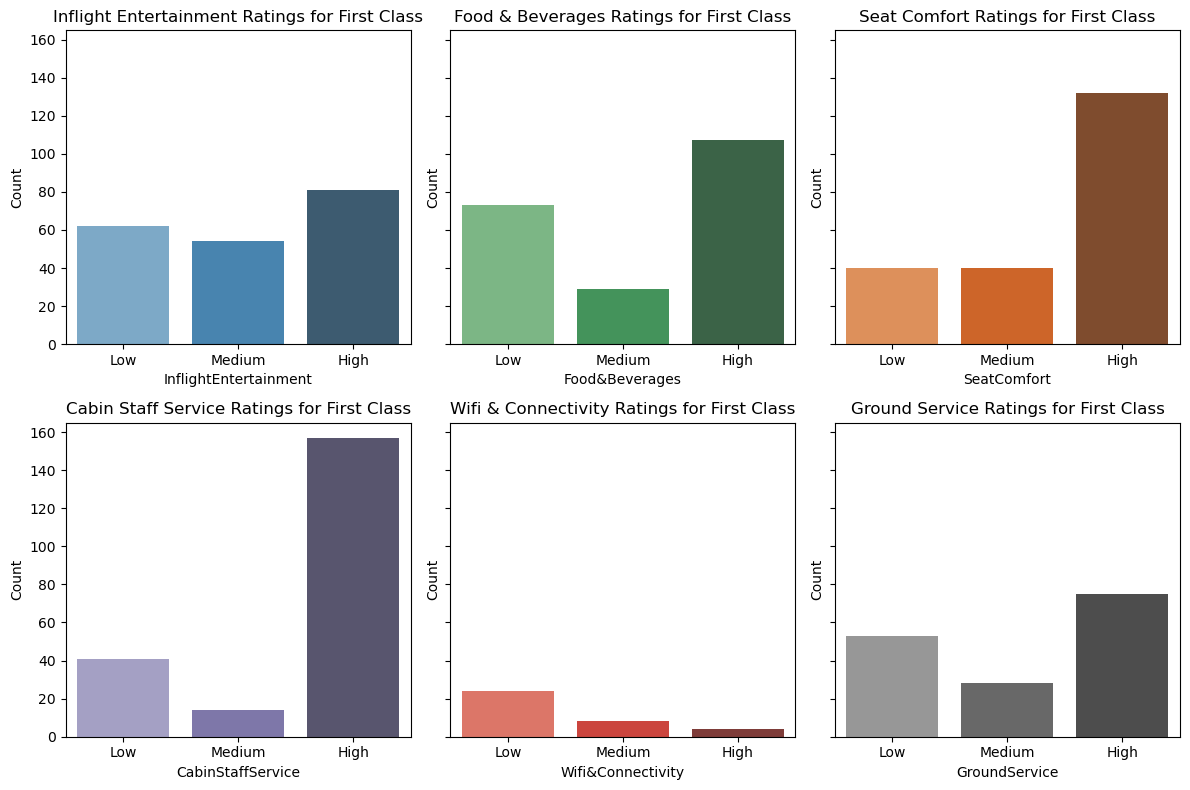

In [17]:
def map_ratings(value):
    if value in [1, 2]:
        return 'Low'
    elif value == 3:
        return 'Medium'
    elif value in [4, 5]:
        return 'High'

first_class_df = BA_DF[BA_DF['SeatType'] == 'First Class'].copy()

first_class_df.loc[:, 'InflightEntertainmentMapped'] = first_class_df['InflightEntertainment'].apply(map_ratings)
first_class_df.loc[:, 'Food&BeveragesMapped'] = first_class_df['Food&Beverages'].apply(map_ratings)
first_class_df.loc[:, 'SeatComfortMapped'] = first_class_df['SeatComfort'].apply(map_ratings)
first_class_df.loc[:, 'CabinStaffServiceMapped'] = first_class_df['CabinStaffService'].apply(map_ratings)
first_class_df.loc[:, 'Wifi&ConnectivityMapped'] = first_class_df['Wifi&Connectivity'].apply(map_ratings)
first_class_df.loc[:, 'GroundServiceMapped'] = first_class_df['GroundService'].apply(map_ratings)

inflight_counts = first_class_df['InflightEntertainmentMapped'].value_counts().reindex(["Low", "Medium", "High"]).reset_index()
inflight_counts.columns = ['InflightEntertainment', 'Count']

food_bev_counts = first_class_df['Food&BeveragesMapped'].value_counts().reindex(["Low", "Medium", "High"]).reset_index()
food_bev_counts.columns = ['Food&Beverages', 'Count']

SeatComfort_counts = first_class_df['SeatComfortMapped'].value_counts().reindex(["Low", "Medium", "High"]).reset_index()
SeatComfort_counts.columns = ['SeatComfort', 'Count']

CabinStaffService_counts = first_class_df['CabinStaffServiceMapped'].value_counts().reindex(["Low", "Medium", "High"]).reset_index()
CabinStaffService_counts.columns = ['CabinStaffService', 'Count']

WifiConnectivity_counts = first_class_df['Wifi&ConnectivityMapped'].value_counts().reindex(["Low", "Medium", "High"]).reset_index()
WifiConnectivity_counts.columns = ['Wifi&Connectivity', 'Count']

GroundService_counts = first_class_df['GroundServiceMapped'].value_counts().reindex(["Low", "Medium", "High"]).reset_index()
GroundService_counts.columns = ['GroundService', 'Count']

fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharey=True)
sns.barplot(ax=axes[0, 0], x='InflightEntertainment', y='Count', data=inflight_counts, palette='Blues_d', order=["Low", "Medium", "High"])
axes[0, 0].set_title('Inflight Entertainment Ratings for First Class')
sns.barplot(ax=axes[0, 1], x='Food&Beverages', y='Count', data=food_bev_counts, palette='Greens_d', order=["Low", "Medium", "High"])
axes[0, 1].set_title('Food & Beverages Ratings for First Class')
sns.barplot(ax=axes[0, 2], x='SeatComfort', y='Count', data=SeatComfort_counts, palette='Oranges_d', order=["Low", "Medium", "High"])
axes[0, 2].set_title('Seat Comfort Ratings for First Class')
sns.barplot(ax=axes[1, 0], x='CabinStaffService', y='Count', data=CabinStaffService_counts, palette='Purples_d', order=["Low", "Medium", "High"])
axes[1, 0].set_title('Cabin Staff Service Ratings for First Class')
sns.barplot(ax=axes[1, 1], x='Wifi&Connectivity', y='Count', data=WifiConnectivity_counts, palette='Reds_d', order=["Low", "Medium", "High"])
axes[1, 1].set_title('Wifi & Connectivity Ratings for First Class')
sns.barplot(ax=axes[1, 2], x='GroundService', y='Count', data=GroundService_counts, palette='Greys_d', order=["Low", "Medium", "High"])
axes[1, 2].set_title('Ground Service Ratings for First Class')

plt.tight_layout()
plt.show()

<div style="direction: rtl; text-align: right;">
מסקנה
<br>
ראינו שאחוז הלא ממליצים במחלקתFirstclass יותר גובה מאחוז הממליצים.
<br>
זו המחלקה שהדירוג הכללי שלה הכי גבוה ומעבר לזה זו המחלקה שמשלמים בה את המחיר היקר ביותר לכרטיס, אז מדוע יותר מחצי לא מרוצים?
<br>
בדקנו כל אחת מהקטגוריות כדי להבין איפה נמצאת הבעיה.
<br>
נוכחנו לגלות שאמנם יותר מחצי אמרו כי אינם ממליצים אבל ברוב הקטגוריות הדירוגים הגבוהים הם המובילים,כלומר יש סתירה בין שביעות הרצון הכוללת לבין הדירוגים של כל קטגוריה בפועל  .

</div>

## <b id="section_2">  </b> <b style='color:#F05454'>Fourth Conclusion </b> <b></b> 
---

חילוץ עיר המוצא מעמודת Route:

In [18]:
BA_DF['Departures'] = BA_DF['Route'].apply(lambda x: str(x).split()[0] if pd.notnull(x) else x)


BA_DF['Departures'] = BA_DF['Departures'].replace('Heathrow', 'LHR')
BA_DF['Departures'] = BA_DF['Departures'].replace('Gatwick', 'LGW')
BA_DF['Departures'] = BA_DF['Departures'].replace('FRA', 'Frankfurt')
BA_DF['Departures'] = BA_DF['Departures'].replace('LAX', 'Los')
BA_DF['Departures'] = BA_DF['Departures'].replace('YVR', 'Vancouver')
BA_DF['Departures'] = BA_DF['Departures'].replace('YVR-LIS', 'Vancouver')
BA_DF['Departures'] = BA_DF['Departures'].replace('SFO', 'San Francisco')
BA_DF['Departures'] = BA_DF['Departures'].replace('Manchester,', 'Manchester')
BA_DF['Departures'] = BA_DF['Departures'].replace('İstanbul,', 'Istanbul')
BA_DF['Departures'] = BA_DF['Departures'].replace('San Jose,', 'San Jose')
BA_DF['Departures'] = BA_DF['Departures'].replace('Sao', 'Sao Paulo')
BA_DF['Departures'] = BA_DF['Departures'].replace('Edimbourgh', 'Edinburgh')
BA_DF['Departures'] = BA_DF['Departures'].replace('Edinburgh-Florence', 'Edinburgh')
BA_DF['Departures'] = BA_DF['Departures'].replace('Kuwait', 'Kuwait City')
BA_DF['Departures'] = BA_DF['Departures'].replace('Cape', 'Cape Town')
BA_DF['Departures'] = BA_DF['Departures'].replace('LHR-BOM', 'London')
BA_DF['Departures'] = BA_DF['Departures'].replace('Mexico', 'Mexico City')
BA_DF['Departures'] = BA_DF['Departures'].replace('LHR-DEN', 'London')
BA_DF['Departures'] = BA_DF['Departures'].replace('ORD-LHR', 'Chicago')
BA_DF['Departures'] = BA_DF['Departures'].replace('LHR-GLA', 'London')
BA_DF['Departures'] = BA_DF['Departures'].replace('MAN-LHR', 'Manchester')
BA_DF['Departures'] = BA_DF['Departures'].replace('GLA-LHR', 'GLA')
BA_DF['Departures'] = BA_DF['Departures'].replace('FRA-LHR', 'Frankfurt')
BA_DF['Departures'] = BA_DF['Departures'].replace('London-Vancouver', 'London')
BA_DF['Departures'] = BA_DF['Departures'].replace('LHR-ORD', 'London')
BA_DF['Departures'] = BA_DF['Departures'].replace('BOM-LHR', 'BOM')
BA_DF['Departures'] = BA_DF.apply(
    lambda row: ' '.join(str(row['Route']).split()[:2]) if row['Departures'] == 'New' else row['Departures'],
    axis=1)
BA_DF['Departures'] = BA_DF.apply(
    lambda row: ' '.join(str(row['Route']).split()[:2]) if row['Departures'] == 'San' else row['Departures'],
    axis=1)
airport_to_city = {
    'LGW': 'London', 'LHR': 'London', 'CDG': 'Paris', 'JFK': 'New York',
    'FRA': 'Frankfurt', 'LAX': 'Los Angeles', 'ORD': 'Chicago', 'SFO': 'San Francisco',
    'ATL': 'Atlanta', 'MIA': 'Miami', 'MUC': 'Munich', 'SIN': 'Singapore',
    'DXB': 'Dubai', 'AMS': 'Amsterdam', 'HND': 'Tokyo', 'NRT': 'Tokyo',
    'IAH': 'Houston', 'DFW': 'Dallas', 'DEN': 'Denver', 'SEA': 'Seattle',
    'CLT': 'Charlotte', 'PHX': 'Phoenix', 'MCO': 'Orlando', 'BOS': 'Boston',
    'FCO': 'Rome', 'LAS': 'Las Vegas', 'YYZ': 'Toronto', 'BKK': 'Bangkok',
    'ZRH': 'Zurich', 'MEL': 'Melbourne', 'SYD': 'Sydney', 'CPT': 'Cape Town',
    'GRU': 'Sao Paulo', 'BCN': 'Barcelona', 'MAD': 'Madrid', 'BOM': 'Mumbai',
    'DEL': 'Delhi', 'DOH': 'Doha', 'KUL': 'Kuala Lumpur', 'ICN': 'Seoul',
    'IST': 'Istanbul', 'VIE': 'Vienna', 'DUB': 'Dublin', 'LIS': 'Lisbon',
    'SVO': 'Moscow', 'MEX': 'Mexico City', 'NBO': 'Nairobi', 'PRG': 'Prague',
    'HEL': 'Helsinki', 'CPH': 'Copenhagen', 'OSL': 'Oslo', 'ARN': 'Stockholm',
    'MAN': 'Manchester', 'MNL': 'Manila', 'BNE': 'Brisbane', 'KIX': 'Osaka',
    'VCE': 'Venice', 'LIM': 'Lima', 'YVR': 'Vancouver', 'EZE': 'Buenos Aires','ORY': 'Paris', 'GOT': 'Gothenburg', 'LBA': 'Leeds', 'TPA': 'Tampa',
    'SOF': 'Sofia', 'IAD': 'Washington', 'MLA': 'Valletta', 'GLA': 'Glasgow',
    'LED': 'Saint Petersburg', 'PVG': 'Shanghai', 'ATH': 'Athens', 'FUE': 'Fuerteventura',
    'IKA': 'Tehran', 'CUN': 'Cancún', 'BUD': 'Budapest', 'BWI': 'Baltimore', 'KBP': 'Kyiv',
    'UVF': 'Vieux Fort', 'SAN': 'San Diego', 'CTU': 'Chengdu', 'MAA': 'Chennai', 'TLV': 'Tel Aviv',
    'RAK': 'Marrakech', 'DUS': 'Düsseldorf', 'JNB': 'Johannesburg', 'MRU': 'Port Louis',
    'LCA': 'Larnaca', 'KWI': 'Kuwait City', 'EDI': 'Edinburgh', 'CNX': 'Chiang Mai',
    'BRI': 'Bari', 'PMI': 'Palma de Mallorca', 'AGP': 'Málaga', 'DBV': 'Dubrovnik',
    'YYC': 'Calgary', 'LCY': 'London', 'SJO': 'San José', 'SJC': 'San Jose', 'BAH': 'Manama',
    'AUH': 'Abu Dhabi', 'NAP': 'Naples', 'OPO': 'Porto', 'TXL': 'Berlin', 'WAW': 'Warsaw',
    'PHL': 'Philadelphia', 'ABV': 'Abuja', 'BLR': 'Bangalore', 'ABZ': 'Aberdeen',
    'BSL': 'Basel', 'MXP': 'Milan', 'GVA': 'Geneva', 'MRS': 'Marseille', 'NCL': 'Newcastle',
    'NAS': 'Nassau', 'BGI': 'Bridgetown', 'IBZ': 'Ibiza', 'LYS': 'Lyon', 'PSA': 'Pisa',
    'ACC': 'Accra', 'GIB': 'Gibraltar', 'PEK': 'Beijing', 'RUH': 'Riyadh', 'SVQ': 'Seville',
    'TRN': 'Turin', 'AUS': 'Austin', 'PUJ': 'Punta Cana', 'OUL': 'Oulu', 'OTP': 'Bucharest',
    'FNC': 'Funchal', 'iAH': 'Houston', 'NCE': 'Nice', 'JED': 'Jeddah', 'YUL': 'Montreal',
    'SSH': 'Sharm El Sheikh', 'lgw': 'London', 'DME': 'Moscow'}
    


BA_DF['Departures'] = BA_DF['Departures'].replace(airport_to_city)


In [19]:
print(BA_DF['Departures'].unique())

['London' 'Brussels' 'Bucharest' 'Manchester' 'Seville' 'Dublin'
 'Anchorage' 'Seattle' 'Malta' 'San Francisco' 'İstanbul' 'Geneva'
 'Istanbul' 'Porto' 'Catania' 'Berlin' 'Atlanta' 'Singapore' 'Chicago'
 'Athens' 'Milan' 'Dallas' 'Miami' 'Prague' 'San Diego' 'Hamburg'
 'Johannesburg' 'Madrid' 'Kuwait City' 'Frankfurt' 'Mumbai' 'Houston'
 'Los' 'New York' 'Tenerife' 'Newark' 'Delhi' 'Copenhagen' 'Larnaca'
 'Washington' 'Edinburgh' 'Keflavik' 'Gibraltar' 'Rhodes' 'Barcelona'
 'Inverness' 'Amsterdam' 'Dalaman' 'Newcastle' 'Amman' 'Chennai'
 'Kingston' 'Glasgow' 'Dubai' 'Cairo' 'New Orleans' 'Marseille' 'Tokyo'
 'Santiago' 'Sydney' 'Vancouver' 'Boston' 'Nice' 'Las' 'Lisbon' nan
 'Sweden' 'Bangalore' 'Hong' 'Santorini' 'Faro' 'Belfast' 'Mexico City'
 'Marrakech' 'Munich' 'Zagreb' 'Portland' 'Lyon' 'Oslo' 'Islamabad'
 'Palma' 'Cape Town' 'Vienna' 'Doha' 'Barbados' 'Denver' 'Montreal'
 'Dusseldorf' 'Baltimore' 'Orlando' 'Jersey' 'Gothenburg' 'Tel' 'Accra'
 'Nairobi' 'Sao Paulo' 'Venice' 'Edmo

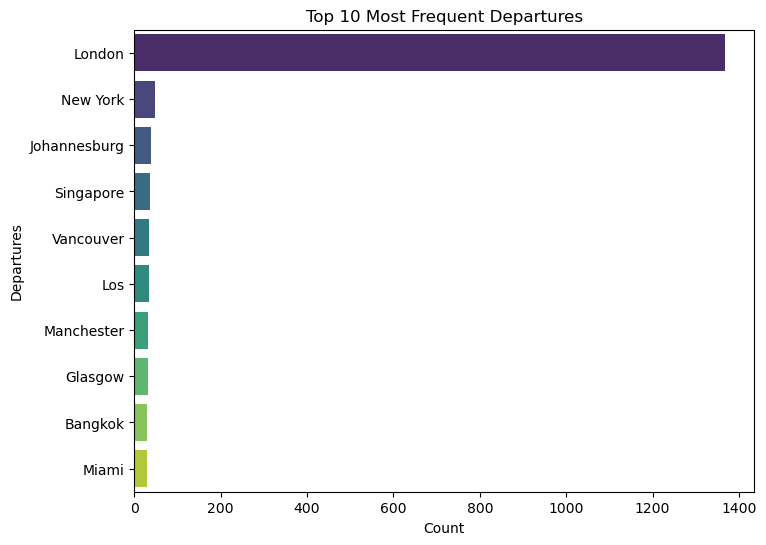

In [20]:
top_departures = BA_DF['Departures'].value_counts().nlargest(10).reset_index()
top_departures.columns = ['Departures', 'Count']

plt.figure(figsize=(8, 6))
sns.barplot(x='Count', y='Departures', data=top_departures, palette='viridis')
plt.title('Top 10 Most Frequent Departures')

plt.show()

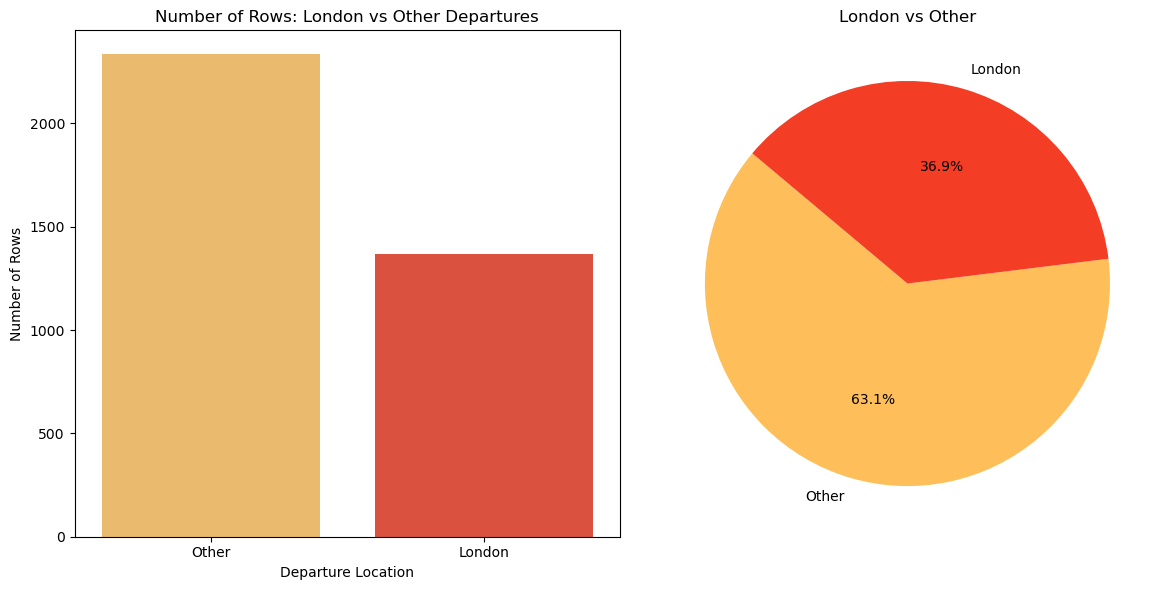

In [21]:
BA_DF['IsLondon'] = BA_DF['Departures'].apply(lambda x: 'London' if x == 'London' else 'Other')
counts = BA_DF['IsLondon'].value_counts().reset_index()
counts.columns = ['IsLondon', 'Count']
value_counts = BA_DF['IsLondon'].value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x='IsLondon', y='Count', data=counts, palette="YlOrRd", ax=ax1)
ax1.set_title('Number of Rows: London vs Other Departures')
ax1.set_xlabel('Departure Location')
ax1.set_ylabel('Number of Rows')

colors = sns.color_palette('YlOrRd', len(value_counts))
ax2.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
ax2.set_title('London vs Other')

plt.tight_layout()
plt.show()

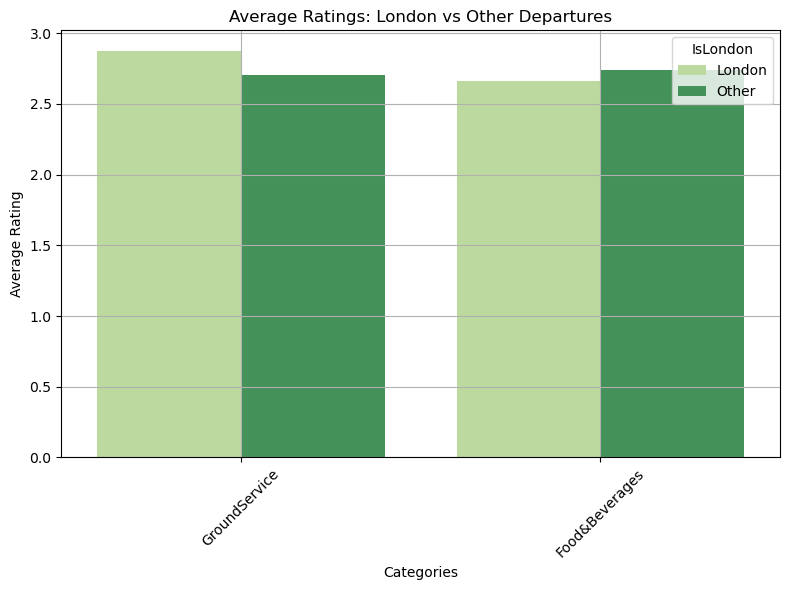

In [22]:
columns_of_interest = ['GroundService', 'Food&Beverages']
means = BA_DF.groupby('IsLondon')[columns_of_interest].mean().reset_index()
means_melted = means.melt(id_vars='IsLondon', var_name='Category', value_name='Mean')

plt.figure(figsize=(8, 6))
sns.barplot(x='Category', y='Mean', hue='IsLondon', data=means_melted, palette="YlGn")
plt.title('Average Ratings: London vs Other Departures')
plt.xlabel('Categories')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)  
plt.grid(True)

plt.tight_layout()
plt.show()

<div style="direction: rtl; text-align: right;">
מסקנה
<br>
בדקנו את 10 הערים הכי מדורגות ומצאנו כי לונדון הינה העיר המובילה אשר מהווה כשליש מכלל הדירוגים, ולכן בדקנו את ממוצע הדירוג בכל קטגוריה בלונדון לעומת שאר הערים.
<br>
כיוון שמדובר בעיר מוצא, הקטגוריות היחידות שעלולות להיות שונות בין עיר לעיר הם צוות הקרקע והאוכל בטיסה, ולכן בדקנו את הבדלי הדירוגים בין טיסות שיצאו מלונדון לטיסות שיצאו משאר הערים.
<br>
אמנם ההבדלים אינם גדולים במיוחד, אך בכל זאת ניתן לראות כי בקטגוריה של צוותי הקרקע- הציונים בלונדון גבוהים יותר ולעומת זאת בקטגוריית האוכל- הציונים בשאר הערים היו גבוהים יותר. 
</div>